In [ ]:
### Step 1: Import all lab

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
### Step 2: load data file

In [38]:
url ='https://github.com/edyoda/data-science-complete-tutorial/blob/master/Data/house_rental_data.csv.txt'

In [39]:
data = pd.read_csv('house_rental_data.csv.txt',sep=',')
data.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [ ]:
### Step 3: Data Claening , Data wrangling, Data Preprocessing

In [40]:
data= data.drop('Unnamed: 0', axis=1)
data.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000


In [41]:
data.shape

(645, 7)

In [42]:
data.isnull().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [43]:
data.drop_duplicates()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
639,2846.400,5,12,4,2,2,138888
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000


In [44]:
data.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000


### Observation:
- Price is dependent on other variable so it is dependent/Target variable.

<AxesSubplot:>

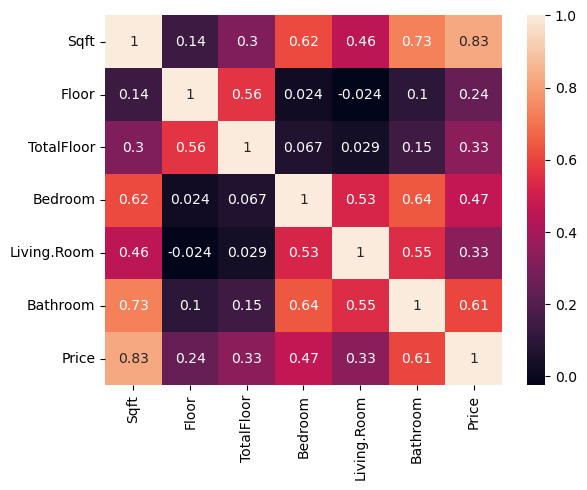

In [45]:
sns.heatmap(data.corr(), annot=True)

#### from heatmap we check that :
- correlation between price and Floor is very less i.e.0.24 
- correlation between price and TotalFloor is very less i.e.0.33
- so we remove these two column


In [46]:
data = data.drop(['Floor','TotalFloor'],axis=1)
data.head()

,Sqft,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,2,2,62000
1,2134.800,4,2,2,78000
2,1138.560,2,2,1,58000
3,1458.780,3,2,2,45000
4,967.776,3,2,2,45000


In [ ]:
### Step 3: Separate X and Y

In [47]:
x= data.drop('Price',axis=1)
y= data['Price']

In [ ]:
### Step 4: Split data into ttrain and test set

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
### Step 5: Apply Linear Regression algorithm

In [54]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression()

In [55]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
### Step 6: Prediction on test data

In [56]:
y_pred = lr.predict(x_test)
y_pred

array([102589.81711043,  37722.55276771,  71388.91659424,  85824.54430081,
        33796.97189911, 110963.85917254, 126813.95122109,  68712.46246791,
        60332.86828901,  39078.13031967,  51319.23699202,  35627.86575631,
        22952.44674492,  61518.99132621,  47111.44781034,  85894.69712779,
        41812.40656595,  36754.56966844,  67374.76773978,  56107.72861854,
        29342.95858882, 158208.4920645 ,  79556.9876221 ,  75965.88506972,
        70614.04148714,  85830.09641759,  70825.03230314,  56383.85247979,
        69134.97643495,  61811.93334119,  87021.40103992,  25769.20652523,
        79979.50158914, 103921.95972177,  56107.72861854,  32652.38516316,
        71599.90741024,  73078.44012738,  54981.02470642,  60051.19231098,
        52792.21759237,  44840.68949731,  79556.9876221 ,  57375.27051968,
        80120.33957816,  47375.77329958,  69487.33757501,  35557.18059429,
       232090.61417767,  66881.5686107 , 151953.79842788,  68642.30964092,
        35627.86575631,  

In [ ]:
### Step 8: Evaluation

In [58]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test,y_pred)
accuracy

0.7354115349051085

- dataset contain 73% accuracy

In [ ]:
LR equation = y = mx + c

In [63]:
m = lr.coef_
m

array([   39.58347077, -2887.44494234, -3397.46222516,  2892.99705913])

In [64]:
c = lr.intercept_
c

10852.178061592771

In [65]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr,x,y,cv=5)

array([0.73369511, 0.70153423, 0.6137    , 0.60648046, 0.72144465])

1st acuracy = 73% 2nd accuracy = 70% 3rd accuracy = 61% 4th accuracy = 60% 5th accuracy = 72%

Out of all 5 accuracies 1st accuracy is the highest hence the 1st train and test set is the best split.